we are downloading a dataset of cats and dogs from a Google Cloud storage link. `wget` is a command-line utility that retrieves files using HTTP, HTTPS, or FTP protocols.

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip



--2024-07-29 18:12:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.6MB/s    in 2.2s    

2024-07-29 18:12:53 (29.6 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Unzip the folder for us


In [ ]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

Locating the training dataset


In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['vectorize.py', 'validation', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



Getting the first ten Image names for the training cats and dogs images

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])



['cat.490.jpg', 'cat.631.jpg', 'cat.929.jpg', 'cat.483.jpg', 'cat.455.jpg', 'cat.958.jpg', 'cat.917.jpg', 'cat.410.jpg', 'cat.270.jpg', 'cat.495.jpg']
['dog.849.jpg', 'dog.452.jpg', 'dog.124.jpg', 'dog.479.jpg', 'dog.299.jpg', 'dog.500.jpg', 'dog.614.jpg', 'dog.837.jpg', 'dog.935.jpg', 'dog.932.jpg']


To know how many images that are in this folder used to train and test the model


In [ ]:
print('total training cat images:', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))



total training cat images: 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
#Visualizing the Images
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images



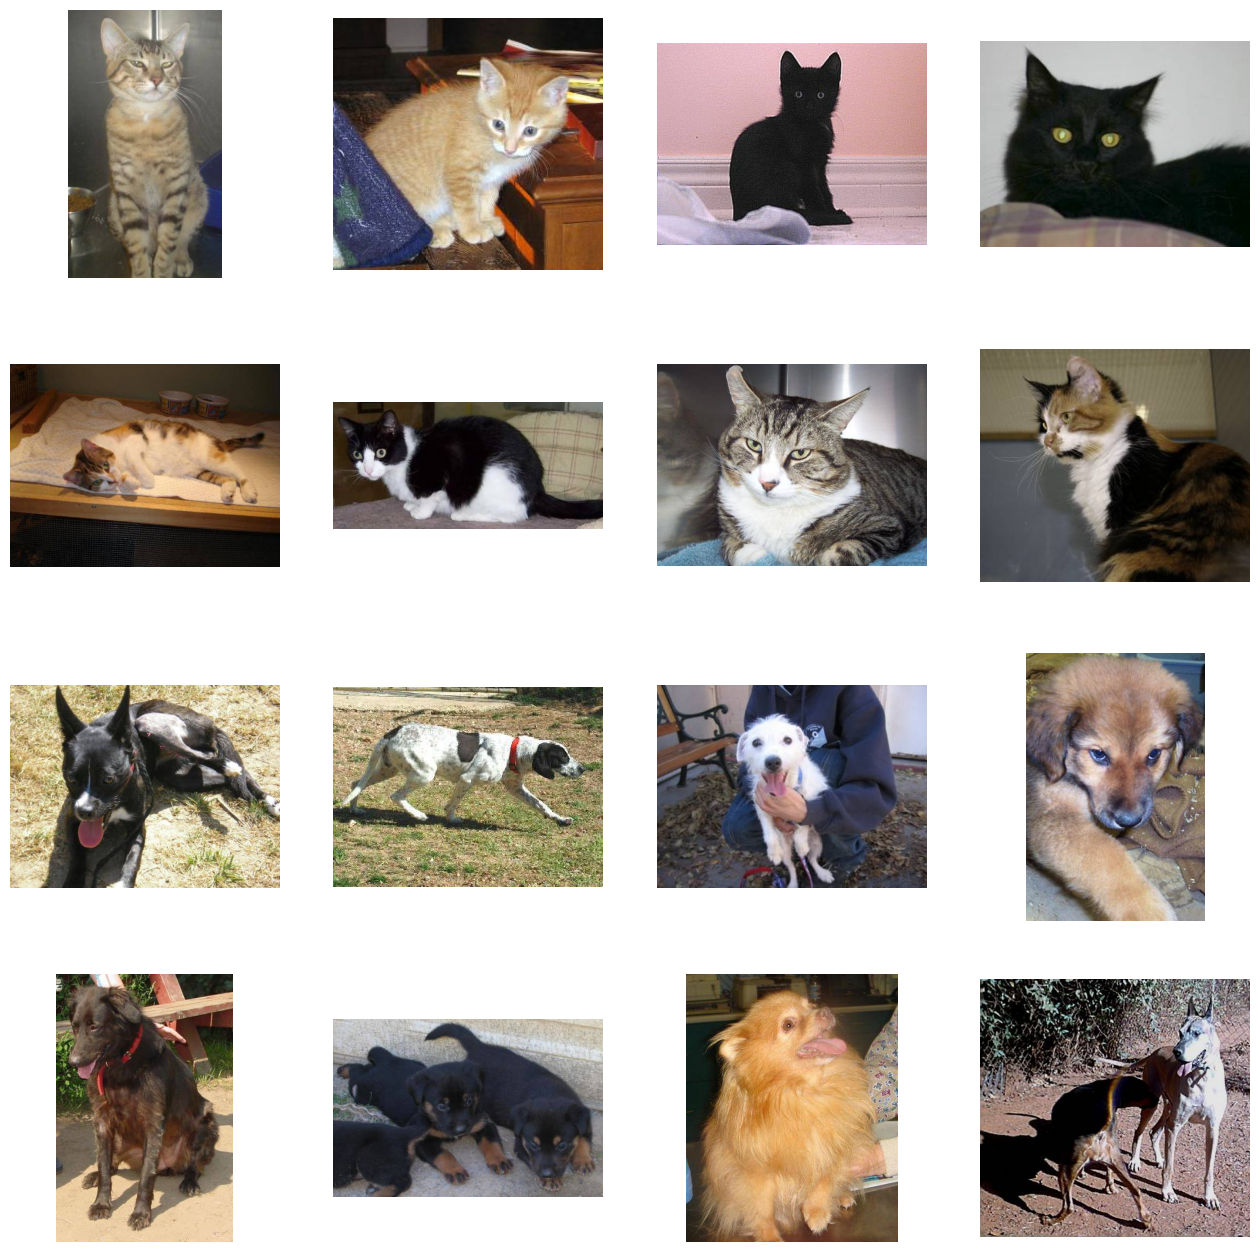

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()





In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

To create the model

In [ ]:
#Then we create the model
from tensorflow.keras.models import Sequential
#model =  Sequential()

In [ ]:
#importing the class used to create layers

from  tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout

In [ ]:
#imporing the class to create another set of layers

from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D

In [ ]:
# import the class to perform encoding

from tensorflow.keras.utils import to_categorical

In [ ]:
#Creating the model with the layers


model = Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
MaxPooling2D(2,2),
   Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(2,2),
Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
Flatten(),
    # 512 neuron hidden layer
Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
Dense(1, activation='sigmoid')
])





In [ ]:
#This gives the summary of the model activities
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
#Compiling the components for backward propagation in a model
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])


#Loading The Train Images with the Image Augmentation Technique
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Training the dataset
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )



Epoch 1/15
100/100 - 73s - loss: 0.8615 - accuracy: 0.5385 - val_loss: 0.6804 - val_accuracy: 0.5000 - 73s/epoch - 734ms/step
Epoch 2/15
100/100 - 71s - loss: 0.6827 - accuracy: 0.6015 - val_loss: 0.6793 - val_accuracy: 0.5730 - 71s/epoch - 709ms/step
Epoch 3/15
100/100 - 78s - loss: 0.6189 - accuracy: 0.6600 - val_loss: 0.5879 - val_accuracy: 0.6850 - 78s/epoch - 778ms/step
Epoch 4/15
100/100 - 71s - loss: 0.5625 - accuracy: 0.7130 - val_loss: 0.5709 - val_accuracy: 0.6860 - 71s/epoch - 708ms/step
Epoch 5/15
100/100 - 74s - loss: 0.5123 - accuracy: 0.7455 - val_loss: 0.5930 - val_accuracy: 0.6940 - 74s/epoch - 740ms/step
Epoch 6/15
100/100 - 74s - loss: 0.4639 - accuracy: 0.7890 - val_loss: 0.5340 - val_accuracy: 0.7330 - 74s/epoch - 740ms/step
Epoch 7/15
100/100 - 71s - loss: 0.3924 - accuracy: 0.8185 - val_loss: 0.5548 - val_accuracy: 0.7210 - 71s/epoch - 712ms/step
Epoch 8/15
100/100 - 71s - loss: 0.3300 - accuracy: 0.8595 - val_loss: 0.5972 - val_accuracy: 0.7260 - 71s/epoch - 714

<Figure size 640x480 with 0 Axes>

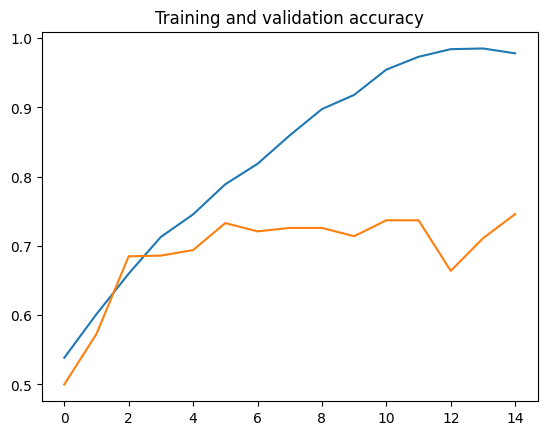

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing the accuracy of both training and validation dataset

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()



This is an overfitting

Treating overfitting in this model
Here we are going to create a second model, implement data augmentation and train the model, then we will be able to see the difference in accuracy and result between the first and the second model


In [ ]:
secondModel = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
#This code above creates the second model
#This gives a summary of the model architecture


secondModel.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:


from tensorflow.keras.optimizers import RMSprop

secondModel.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])



This code above creates the components for the backward propagation
for the second model.

After this then we now have to implement the data augmentation technique by first import the library/class we are going to use to do use which is the ImageData


In [ ]:
#Generator from CNN

from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)



Here we are implementing the image augmentation processes on only the training dataset



In [ ]:
#Now using the train_datagen and the test_datagen to import these image from their directory

# Flow training images in batches of 20 using train_datagen generator
# --------------------
second_train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
second_validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Then we can now train the second model
secondHistory = secondModel.fit(
            second_train_generator,
            epochs=15,
            validation_data=second_validation_generator,
            verbose=2
            )



Epoch 1/15
100/100 - 92s - loss: 0.8016 - accuracy: 0.5230 - val_loss: 0.6889 - val_accuracy: 0.5360 - 92s/epoch - 922ms/step
Epoch 2/15
100/100 - 84s - loss: 0.6923 - accuracy: 0.5405 - val_loss: 0.7271 - val_accuracy: 0.5090 - 84s/epoch - 840ms/step
Epoch 3/15
100/100 - 85s - loss: 0.6799 - accuracy: 0.5820 - val_loss: 0.6498 - val_accuracy: 0.6410 - 85s/epoch - 848ms/step
Epoch 4/15
100/100 - 82s - loss: 0.6529 - accuracy: 0.6130 - val_loss: 0.6094 - val_accuracy: 0.6520 - 82s/epoch - 819ms/step
Epoch 5/15
100/100 - 83s - loss: 0.6302 - accuracy: 0.6360 - val_loss: 0.6364 - val_accuracy: 0.6080 - 83s/epoch - 829ms/step
Epoch 6/15
100/100 - 83s - loss: 0.6262 - accuracy: 0.6565 - val_loss: 0.6346 - val_accuracy: 0.6220 - 83s/epoch - 830ms/step
Epoch 7/15
100/100 - 83s - loss: 0.6030 - accuracy: 0.6690 - val_loss: 0.5796 - val_accuracy: 0.6720 - 83s/epoch - 827ms/step
Epoch 8/15
100/100 - 85s - loss: 0.5921 - accuracy: 0.6735 - val_loss: 0.5878 - val_accuracy: 0.6900 - 85s/epoch - 847

<Figure size 640x480 with 0 Axes>

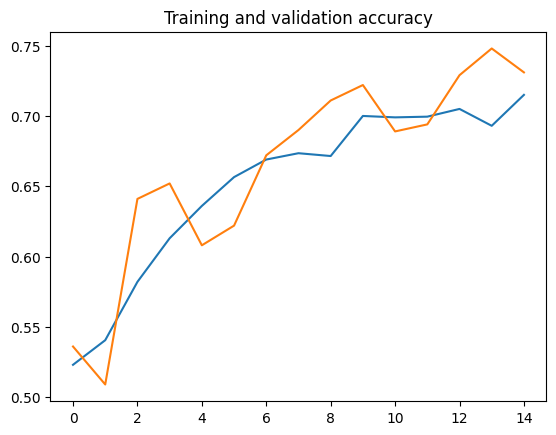

<Figure size 640x480 with 0 Axes>

In [ ]:
#Then you can now visualize the accuracy of the training and validation datasets used to train the second model like this below

acc      = secondHistory.history[     'accuracy' ]
val_acc  = secondHistory.history[ 'val_accuracy' ]
loss     = secondHistory.history[    'loss' ]
val_loss = secondHistory.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


